In [1]:
# 그럼 첫번째 레슨 : 라이브러리 불러오기

#필요한 딥러닝 관련 라이브러리를 불러옵니다.

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# 🗂️ Step 2: 데이터 불러오기

#CIFAR-10 데이터셋을 불러오고, 학습용/테스트용으로 분리합니다.

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


## 과제1. 데이터의 구조를 살펴보세요. 사이즈는?

In [3]:
# 여기에서 확인해 보세요.
print("Shape of train_images:", train_images.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_images:", test_images.shape)
print("Shape of test_labels:", test_labels.shape)

Shape of train_images: (50000, 32, 32, 3)
Shape of train_labels: (50000, 1)
Shape of test_images: (10000, 32, 32, 3)
Shape of test_labels: (10000, 1)


In [4]:
# 🏷️ Step 3: 클래스 이름 정의

#CIFAR-10의 라벨은 숫자로 되어 있으므로, 사람이 이해할 수 있도록 이름을 부여합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## 과제2. 아래 코드의 빈칸을 채워 CNN 모델을 완성해보세요.
#### layer나 패딩 혹은 drop out, batch normalization을 추가해 가며 모델의 정확도 변화를 보는 것도 좋습니다.

In [5]:
# 🧱 Step 4: CNN 모델 구성
# Convolution → MaxPooling → Flatten → Dense 구조로 CNN을 설계합니다.
# 아래의 빈칸 (___)을 채워 모델을 완성해보세요.

model = models.Sequential()

# 첫 번째 합성곱 레이어 : 32 filters / kernel size 3x3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # TODO: 커널 개수 설정

# 첫 번째 풀링 레이어 : 2x2 pooling
model.add(layers.MaxPooling2D((2, 2)))  # TODO: 풀링 크기 설정

# 두 번째 합성곱 레이어 : 64 filters / kernel size 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # TODO: 커널 크기 설정

# 두 번째 풀링 레이어
model.add(layers.MaxPooling2D((2, 2)))

# 세 번째 합성곱 레이어 : 64 filters / kernel size 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # TODO: 커널 개수 설정

# Flatten + Fully Connected Layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))  # TODO: 은닉층 유닛 수 설정
model.add(layers.Dense(10, activation='softmax'))  # 출력층: CIFAR-10은 클래스가 10개

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 자신이 채운 코드를 기반으로 각 레이어별 Feature Map 크기를 계산해 보세요.
(padding은 디폴트로 없습니다.)

Answer:

| Layer                   | 연산 과정            | output size          |
| --------------------- | ---------------- | -------------- |
| `Conv2D(32, (3,3))`   | 32x32 → 30x30    | `(30, 30, 32)` |
| `MaxPooling2D((2,2))` | 30x30 → 15x15    | `(15, 15, 32)` |
| `Conv2D(64, (3,3))`   | 15x15 → 13x13    | `(13, 13, 64)` |
| `MaxPooling2D((2,2))` | 13x13 → 6x6 (버림) | `(6, 6, 64)`   |
| `Conv2D(64, (3,3))`   | 6x6 → 4x4        | `(4, 4, 64)`   |
| `Flatten()`           | 4x4x64 = 1024    | `1024`         |
| `Dense(64)`           | Fully connected  | `64`           |
| `Dense(10)`           | output               | `10 (클래스 수)`   |

- 연산 formula recap
  - conv2d padding='valid' : output = input - kernel + 1
  - maxpooling(2) : output = input / 2 (decimal point는 버림)

In [6]:
# ⚙️ Step 5: 모델 컴파일

#모델을 학습할 수 있도록 컴파일합니다. 손실 함수, 최적화 방법, 평가지표를 설정합니다.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3056 - loss: 2.3469 - val_accuracy: 0.4748 - val_loss: 1.4461
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5162 - loss: 1.3533 - val_accuracy: 0.5445 - val_loss: 1.3102
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5833 - loss: 1.1808 - val_accuracy: 0.6063 - val_loss: 1.1254
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6158 - loss: 1.0827 - val_accuracy: 0.6098 - val_loss: 1.1238
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6568 - loss: 0.9837 - val_accuracy: 0.6325 - val_loss: 1.0760
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6807 - loss: 0.9082 - val_accuracy: 0.6336 - val_loss: 1.0663
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7000 - loss: 0.8517 - val_accuracy: 0.6613 - val_loss: 0.9972
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7258 - loss: 0.7817 - val_accu

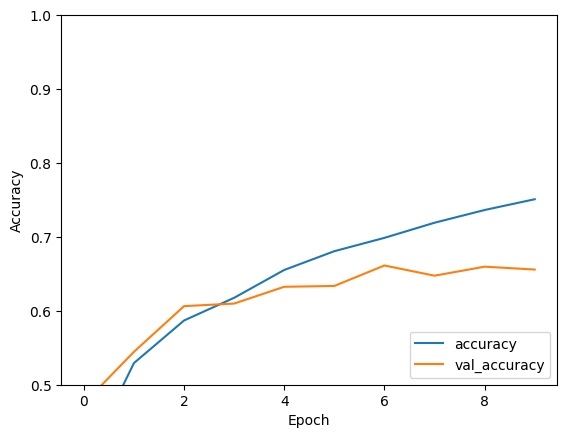

In [7]:
# 🔥 Step 6: 모델 학습 및 성능 평가

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
#모델 성능 평가
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)


In [8]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.6557999849319458


## 과제3. 직접사용해 보기. 이미지를 로드하고 cifar-10의 사이즈로 리사이즈

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


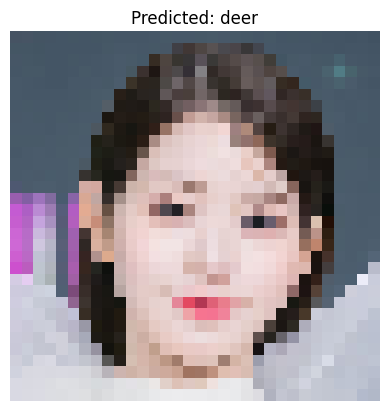

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image

# 새 이미지를 로드하고 모델 예측 수행
def predict_new_image(image_path, model, class_names):
    # 이미지 로드 및 전처리
    img = image.load_img(image_path, target_size=(32, 32))  # CIFAR-10 크기로 리사이즈 빈칸채우기
    img_array = image.img_to_array(img)  # 이미지를 배열로 변환
    img_array = np.expand_dims(img_array, axis=0)  # 배치를 위해 차원 추가
    img_array = img_array / 255.0  # 정규화

    # 예측 수행
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # 가장 높은 확률의 클래스 인덱스
    class_name = class_names[predicted_class]  # 클래스 이름

    # 결과 출력
    plt.imshow(img)
    plt.title(f"Predicted: {class_name}")
    plt.axis('off')
    plt.show()

# 사용 예시
image_path = "/content/img1.jpeg" # 예측할 이미지의 경로 절대경로를 입력하면 됩니다. 뭔가 자신의 얼굴사진을 넣어보면 재미있는일이...
predict_new_image(image_path, model, class_names)


## 왜 255.0으로 나누었을까요? 이미지 전처리에 대한 지식이니 조사해보세요.

Answer: 디지털 이미지는 pixel값이 0-255 범위인 정수값으로 저장되는데, 이는 uint8 형식이기 때문에 정수 연산에는 적합하지만 신경망 학습에는 적절하지 않다는 문제점이 있다. 딥러닝 모델은 내부적으로 floating point arithmetic을 진행하며, ReLU나 Sigmoid와 같은 대부분의 활성화 함수는 작은 실수 범위의 입력값에서 잘 작동한다는 특징이 있다. 이 때문에 픽셀값은 0-255범위에서 0-1로 스케일을 normalization(정규화) 하는 것이고 이는 일반적으로 image/255.0 과 같은 연산을 통해 수행된다. ImageNet 등 대규모 데이터셋 기반 사전학습 모델과의 호환성을 위해서도 일반적으로 적용되는 전처리 과정이라고 한다.

## 과제4. CNN의 inductive bias에 대해서 조사를 해보고 생각해 봅시다.
### CNN은 왜 이미지 처리에 좋을까요? 이미지 말고도 CNN을 잘 쓸 수 있는데는 어디일까요?

Answer: Inductive bias란 학습되지 않은 상황에 대해 정확한 예측을 하기 위해서 사용하는 추가적인 가정을 의미한다. 모든 머신러닝 알고리즘은 train 데이터 이외의 다른 데이터에 대해서도 일반화할 수 있는 능력을 가졌고, 여기서 모델이 목표 함수를 학습하고 train 데이터를 넘어 일반화하기 위해 만든 가정인 inductive bias가 존재하는 것이다.
CNN에서의 대표적인 indeuctive bias로는 local connectivity(일부 영역만 처리), weight sharing(같은 필터가 이미지 전체를 공통된 방식으로 스캔) 등이 존재하며, 이러한 bias 덕분에 CNN은 매우 적은 parameter로도 복잡한 이미지 패턴을 잘 학습할 수 있게 된다.

- CNN이 이미지 처리에 좋은 이유?
  - 이미지에서 중요한 특성 중 하나는 바로 공간 지역성(locality)이고, 이는 위치에 상관없이 반복된다. 이 점에서 CNN의 로컬 필터 구조와 weight sharing은 이러한 특성을 정확하게 반영하기 때문에 적합하다고 볼 수 있다. ex) 고양이 눈, 자동차의 바퀴, 신호등 색깔 은 위치와 상관없이 패턴이 반복됨
- CNN이 이미지 외에 사용되는 다른 분야
  - NLP(1D conv로 특성 추출), 시계열 데이터 분석 (conv1d로 국소 패턴 분석), 자율 주행(카메라 이미지, 신호 처리 등), 오디오 분석(spectrogram 등 2D 이미지 형태로 변환)